# 3D


## Segment foam
This exercise performs the segmentation of connected 3D cells using the same principle used to separate coffee grains. 


In [1]:
import sys
sys.path.append('/home/commun/tp-morpho/')
from tp_init import *

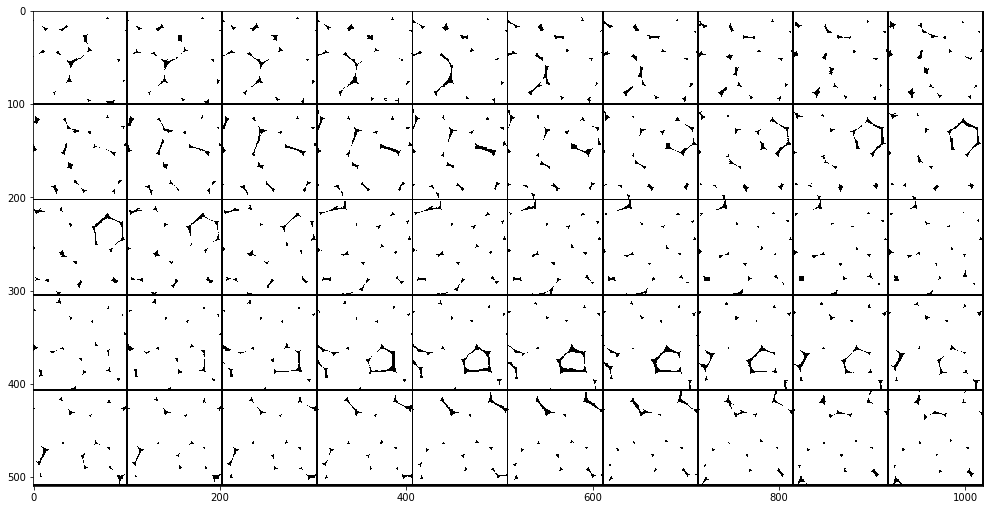

In [2]:
import os
fileName = os.path.join(images_dir ,os.path.join( "3D","mousse_bin.vtk"))
im = Image(fileName)
imdisp0=disp3D(im,0,10,5,0)

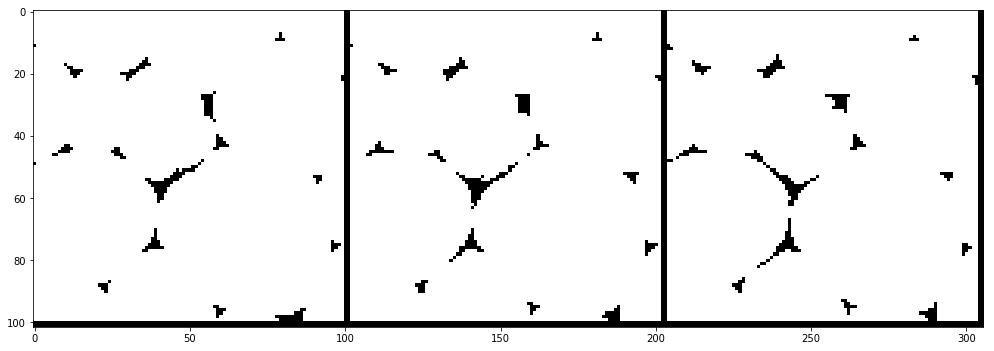

In [3]:
imdisp0=disp3D(im,0,3,1,0)

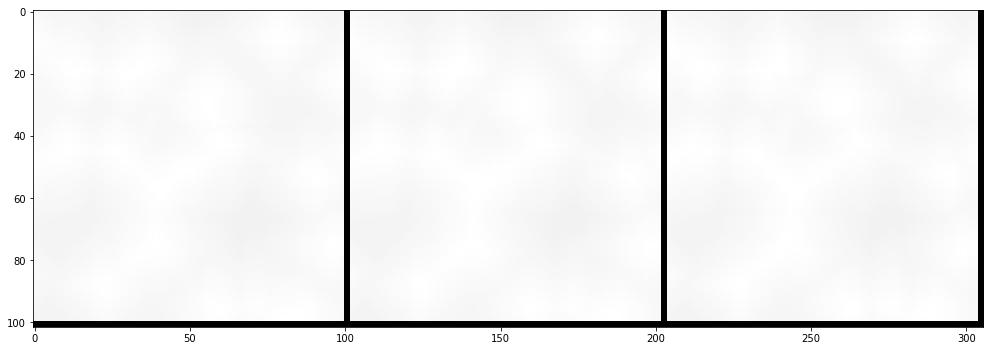

In [4]:
 # Allocate images
imDist = Image(im)
imDFil = Image(imDist)
imTemp = Image(im)
imWS = Image(imDist)
# Choice of the neighborhood graph
nl = Cross3DSE()
# Prepare the image for the segmentation
dist(im,imDist,nl)
sub(imDist,5,imTemp)
build(imTemp,imDist,imDFil,nl)
inv(imDFil,imDist)
#ImDisplay3d(imDist,0,10,5,0)
disp0 = disp3D(imDist,0,3,1,0)


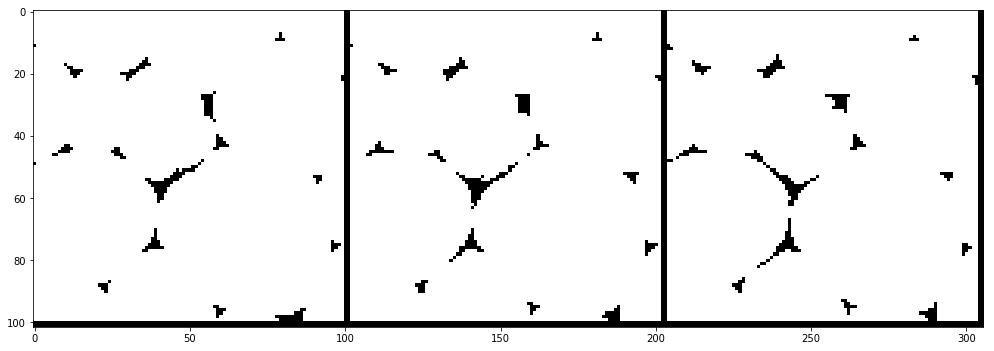

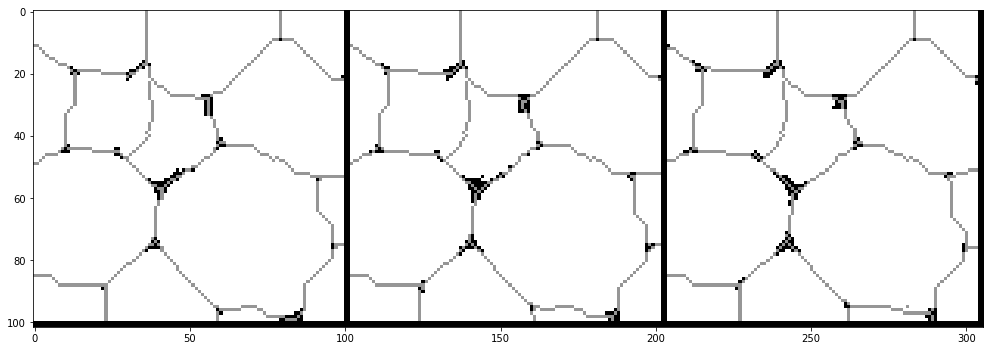

<smilCorePython.Image_UINT8; proxy of <Swig Object of type 'smil::Image< smil::UINT8 > *' at 0x7f0bd04e0300> >

In [5]:
# WS
watershed(imDist,imWS,nl)
# Superimpose the watershed lines
# on the original image.
compare(imWS,"==",255,128,im,imDist)
disp3D(im,0,3,1,0,)
disp3D(imDist,0,3,1,0,)

## Tracking


Tracking step consists in:

* Generate markers from previous result, an uncertainty area of constant thickness along the previous road boundary.
* Compute gradient
* Watershed from markers
* Generate image for display purposes



In [ ]:

"""
Hit the road, Jack...
"""
i = 0
fileName = os.path.join(images_dir ,os.path.join( "Sequences","route","route_"+"%02d"%i+".png"))
im = Image(fileName)

# Allocate images
imGrad = Image(im)
imWat = Image(im)
imRoad = Image(im)
imTemp = Image(im)
imLabel = Image(imRoad)
imInMark = Image(imRoad)
imOutMark = Image(imRoad)

# Choice of the neighborhood graph
nl = HexSE()

# Segmentation with the waterfall algo.
gradient(im,imGrad,nl)
waterfall(imGrad,1,imWat,nl)
inv(imWat,imWat)
print('Segmentation with the waterfall algo')
disp(imWat)

# Reconstruction of the road
imTemp << 0
imTemp.setPixel(128,128,255)
build(imTemp,imWat,imRoad,nl)
print('Reconstruction of the road')
disp(imRoad)

# Generate markers
erode(imRoad,imInMark,nl(3))
dilate(imRoad,imOutMark,nl(3))
inv(imOutMark,imOutMark)
print('Inner and external markers')
disp([imInMark, imOutMark])

# Create a label image from the markers
sup(imInMark,imOutMark,imTemp)
label(imTemp,imLabel,nl)

print('Markers labelled')
disp(imLabel, True)

In [ ]:
print('Starting the tracking!')
for i in range(20):
    # Load next image
    j = i+1
    filename = os.path.join(images_dir ,os.path.join( "Sequences","route","route_"+"%02d"%j+".png"))
    im = Image(filename)
    
    # Segmentation
    gradient(im,imGrad,nl)
    imbasins = Image(imLabel)
    watershed(imGrad,imLabel,imWat,imbasins,nl)
    
    # for Display Purposes
    erode(imRoad,imTemp,nl)
    compare(imTemp,"==",imRoad,im,255,imRoad)
    disp(imRoad)
    
    compare(imbasins,"==",2,255,0,imRoad)
    #disp(imRoad)
    # Update the markers
    compare(imWat,"==",255,0,imbasins,imWat)
    erode(imWat,imLabel,nl(3))
    